In [55]:
#import relevant packages and rename them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.stats.proportion import proportions_ztest

In [56]:
#data preparation and cleaning
#import dataset containing containing gender
df_gender = pd.read_excel("C:/Users/Maya/Documents/Workshop Python/Dataset_Gender.xlsx")

In [57]:
#check properties of gender dataset
print(df_gender.head())
print(df_gender.shape) # (10000, 13)
print(df_gender.describe)
print(df_gender.dtypes)
print(df_gender.columns)

   Column1  index       artist gender  age    type country city_1 district_1  \
0        0      0        Drake   male   33  person      CA    NaN        NaN   
1        1      1  Post Malone   male   25  person      US    NaN        NaN   
2        2      2   Ed Sheeran   male   29  person      GB    NaN        NaN   
3        3      3     J Balvin   male   35  person      CO    NaN        NaN   
4        4      4    Bad Bunny   male   26  person      PR    NaN        NaN   

     city_2 district_2 city_3 district_3  
0   Toronto        NaN    NaN        NaN  
1  Syracuse        NaN    NaN        NaN  
2   Halifax        NaN    NaN        NaN  
3  Medellín        NaN    NaN        NaN  
4  San Juan        NaN    NaN        NaN  
(10000, 13)
<bound method NDFrame.describe of       Column1  index              artist  gender  age    type country  \
0           0      0               Drake    male   33  person      CA   
1           1      1         Post Malone    male   25  person      US

In [58]:
#drop irrelevant columns from gender dataset
df_gender = df_gender.drop(['Column1','country','age','city_1','district_1','city_2','district_2','city_3','district_3'], axis=1)
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9995,4991,si_el_bien,NaN,NaN
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person
9998,4994,Vertical Horizon,mixed,group


In [59]:
#check if there are NaN values and which columns consist of NaN values
print(df_gender.isnull().sum()) # 1752
print(df_gender['artist'].isnull().sum()) # 0
print(df_gender['gender'].isnull().sum()) # 1752
print(df_gender['type'].isnull().sum()) # 1752

index        0
artist       0
gender    1752
type      1752
dtype: int64
0
1752
1752


In [60]:
#considering that a large part of the data has NaN values, and checking by hand what the 'gender' and 'type' of the artists with NaN values is would require a lot of time, we decided to delete rows with NaN values from the gender dataset
df_gender = df_gender.dropna(axis=0)
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9994,4990,Klara Hammarström,female,person
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person
9998,4994,Vertical Horizon,mixed,group


In [61]:
#check possible values of 'type' and 'gender'
print(df_gender["gender"].unique()) #'male', 'female', 'mix', 'other'
print(df_gender["type"].unique()) # 'person', 'group'

['male' 'female' 'mixed' 'other']
['person' 'group']


In [62]:
#delete artists that are defined as 'person' in column 'type' as we don't want to include 'groups' for our analyses
#delete artists that are defined as 'other' in the column 'gender'
df_gender = df_gender[df_gender.type == 'person']
df_gender = df_gender[df_gender.gender != 'other']
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9993,4989,Nasty C,male,person
9994,4990,Klara Hammarström,female,person
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person


In [63]:
#check whether the former step was done correctly, by checking the values of the relevant columns
print(df_gender["gender"].unique()) #'female', 'male'
print(df_gender["type"].unique()) #'person'

['male' 'female']
['person']


In [64]:
#data preparation and cleaning
#import dataset containing music
df_music = pd.read_excel("C:/Users/Maya/Documents/Workshop Python/Dataset_Music.xlsx")

In [65]:
#check properties of music dataset
print(df_music.head())
print(df_music.shape) # (2000, 18)
print(df_music.describe)
print(df_music.dtypes)
print(df_music.columns)

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77           751     834    1     -5444     0          437   
1          79           434     897    0     -4918     1          488   
2          66           529     496    7     -9007     1           29   
3          78           551     913    0     -4063     0          466   
4          65           614     928    8     -4806     0          516   

   acousticness  instrumentalness  liveness  valence   tempo         genre  
0           3.0           0.00177      

In [66]:
#analyze the music dataset by creating a correlation table and heatmap
#create correlation table
correlation_music = df_music.corr()
correlation_music

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.123595,-0.316534,0.050617,-0.053560,-0.058321,-0.002560,-0.048719,-0.003848,-0.048041,0.013702,-0.012033,0.029562,-0.075883,-0.037654
explicit,0.123595,1.000000,0.078477,0.046605,0.115305,-0.087412,0.003320,-0.047356,0.049576,-0.110106,-0.010669,-0.109552,0.001896,-0.025880,0.023676
year,-0.316534,0.078477,1.000000,-0.003825,0.045113,-0.049516,0.007380,0.005289,-0.007358,0.058447,-0.008970,-0.044187,-0.016085,-0.153841,0.040219
popularity,0.050617,0.046605,-0.003825,1.000000,0.005421,-0.007937,0.014823,0.029667,-0.021353,0.002390,-0.019467,-0.027572,-0.044462,-0.024201,0.010681
danceability,-0.053560,0.115305,0.045113,0.005421,1.000000,-0.009766,0.050671,-0.021477,-0.065051,0.022298,0.005941,0.032030,0.051357,0.143528,-0.049258
energy,-0.058321,-0.087412,-0.049516,-0.007937,-0.009766,1.000000,-0.009211,0.300688,-0.036654,0.030703,-0.051272,0.084725,-0.012178,0.121986,0.073137
key,-0.002560,0.003320,0.007380,0.014823,0.050671,-0.009211,1.000000,-0.001116,-0.153182,-0.036999,-0.042612,0.030717,-0.009347,0.009656,-0.013455
loudness,-0.048719,-0.047356,0.005289,0.029667,-0.021477,0.300688,-0.001116,1.000000,-0.052984,0.039120,-0.037320,-0.067953,-0.005772,0.132971,0.053494
mode,-0.003848,0.049576,-0.007358,-0.021353,-0.065051,-0.036654,-0.153182,-0.052984,1.000000,-0.014835,0.014233,0.000636,-0.039501,-0.064525,0.026759
speechiness,-0.048041,-0.110106,0.058447,0.002390,0.022298,0.030703,-0.036999,0.039120,-0.014835,1.000000,-0.003358,0.019952,-0.025293,0.033595,0.013689


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

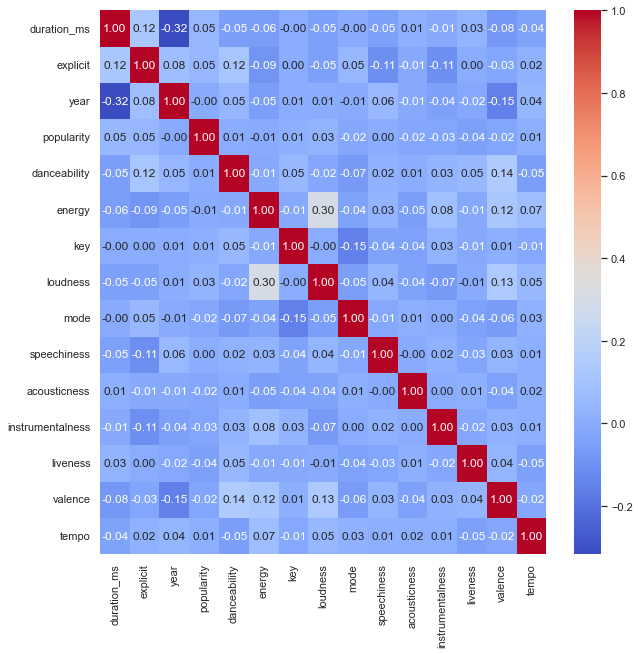

In [67]:
#create heatmap with correlation between the variables in the dataset
plt.figure(figsize=(10,10)) #determine size of the figure
sns.heatmap(correlation_music, cmap="coolwarm", annot=True, fmt="0.2f")
plt.figure #there seems to be no real corrolation between the variables

In [68]:
#drop irrelevant columns from music dataset
df_music = df_music.drop(['duration_ms','danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'energy'], axis=1)
df_music

,artist,song,explicit,year,popularity,genre
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop
1,blink-182,All The Small Things,False,1999,79,"rock, pop"
2,Faith Hill,Breathe,False,1999,66,"pop, country"
3,Bon Jovi,It's My Life,False,2000,78,"rock, metal"
4,*NSYNC,Bye Bye Bye,False,2000,65,pop
...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,False,2019,79,pop
1996,Taylor Swift,Cruel Summer,False,2019,78,pop
1997,Blanco Brown,The Git Up,False,2019,69,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,pop


In [69]:
#check if there are NaN values in the music data set
print(df_music.isnull().sum()) #0

artist        0
song          0
explicit      0
year          0
popularity    0
genre         0
dtype: int64


In [70]:
#combine datasets music and gender and drop irrelevant columns
df_combined = pd.merge(df_music, df_gender, on = "artist")
df_combined = df_combined.drop(['index', 'type'], axis = 1)
df_combined

,artist,song,explicit,year,popularity,genre,gender
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop,female
1,Britney Spears,Born to Make You Happy,False,1999,58,pop,female
2,Britney Spears,Lucky,False,2000,65,pop,female
3,Britney Spears,I'm a Slave 4 U,False,2001,69,pop,female
4,Britney Spears,Overprotected - Radio Edit,False,2001,61,pop,female
...,...,...,...,...,...,...,...
1228,Sech,Otro Trago,True,2019,71,latin,male
1229,Sech,Otro Trago,True,2019,71,latin,male
1230,Normani,Motivation,False,2019,71,"pop, R&B",female
1231,Joel Corry,Sorry,False,2019,63,"pop, Dance/Electronic",male


In [71]:
#check whether the merge was done correctly by checking whether the intersection value matches the value of the combined dataset
print(len(df_music['artist'].unique()))
print(len(df_gender['artist'].unique()))
print(len(df_combined['artist'].unique()))
len(set(df_gender['artist'].unique()).intersection(set(df_music['artist'].unique())))

835
5863
386


386

In [72]:
#delete duplicate values in 'artist' by sorting 'popularity' and keeping the most populair song from the duplicate artists
df_combined = df_combined.sort_values(by = 'popularity', ascending = False)
df_combined = df_combined.drop_duplicates(subset = 'artist', keep = "first")
df_combined # (386,7)

,artist,song,explicit,year,popularity,genre,gender
881,Tom Odell,Another Love,True,2013,88,pop,male
23,Eminem,Without Me,True,2002,87,hip hop,male
1097,Billie Eilish,lovely (with Khalid),False,2018,86,"pop, Dance/Electronic",female
733,Bruno Mars,Locked out of Heaven,False,2012,85,pop,male
1142,Post Malone,Circles,False,2019,85,hip hop,male
...,...,...,...,...,...,...,...
848,Grimes,Oblivion,False,2012,0,"pop, rock, Dance/Electronic",female
844,Otto Knows,Million Voices - Radio Edit,False,2012,0,"pop, Dance/Electronic",male
843,Michel Teló,Ai Se Eu Te Pego - Live,False,2012,0,"country, latin",male
1004,Silentó,Watch Me (Whip / Nae Nae),False,2015,0,hip hop,male


<AxesSubplot:>

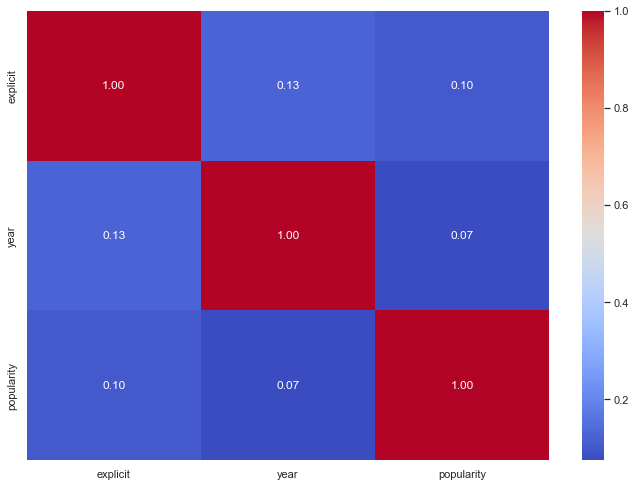

In [73]:
#check heatmaps for gender again
#start by creating seperate dataframes
df_explicit_male = df_combined[df_combined['gender']=='male']
df_explicit_female = df_combined[df_combined['gender']=='female']

#create correlation matrix per gender
corr_male = df_explicit_male.corr()
corr_female = df_explicit_female.corr()

#check heatmaps per gender -> male
sns.heatmap(corr_male, cmap="coolwarm", annot=True, fmt="0.2f")

<AxesSubplot:>

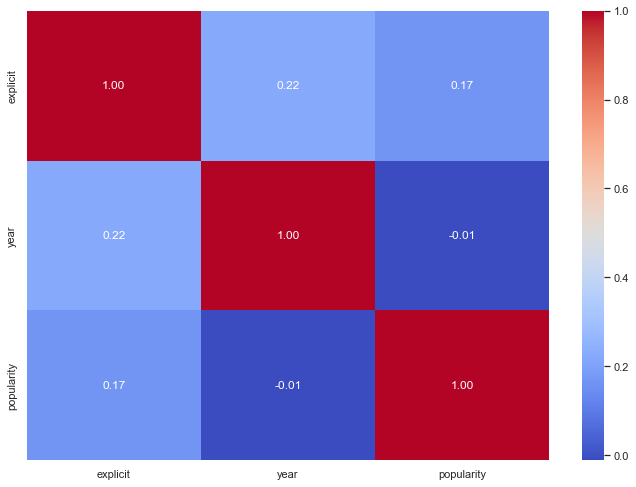

In [74]:
#check heatmaps per gender -> female
sns.heatmap(corr_female, cmap="coolwarm", annot=True, fmt="0.2f")

In [75]:
#transform boolean values in 'explicit' to integers (True = 1, False = 0) to prepare data for visualization and caluclations
df_combined["explicit"] = df_combined["explicit"].astype(int)

In [76]:
#count the amount of male and female artists
print(df_combined['gender'].value_counts()['male']) #280
print(df_combined['gender'].value_counts()['female']) #106

280
106


gender    female  male
explicit              
0             86   166
1             20   114


Text(0.5, 1.0, 'Female')

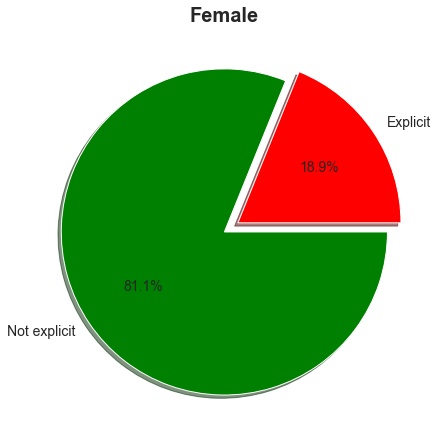

In [77]:
#visualize data showing gender and the use of explicit and non-explicit content, in piecharts
#create a contingency table showing the amount of explicit and non-explicit content used in songs from female and male artists 
contingency_table_gender = pd.crosstab(df_combined.explicit,df_combined.gender) 
print(contingency_table_gender) 

#use the data from the contingency table to create piecharts for each gender with Amount[explicit, non-explicit], Percentages(explicit, total female), (non-explicit, total female) -> reason for using data from the contingency table as opposed to the proportion table is to keep it more accurate
#create pie-chart for female artists
data_women_explicit = ({'Explicit_or_not':["Explicit","Not explicit"],'Amount':[20,86],'Percentages':[["{:.0%}".format(20/106)],["{:.0%}".format(86/106)]]})
colors = ['red','green']
plt.figure(figsize=(7.5,7.5)) #determine size of the figure
explode=[0.1,0] #make the wedge representing 'explicit' stand out
pie_women=plt.pie(data_women_explicit['Amount'],colors=colors,shadow=True,autopct='%1.1f%%',explode=explode, labels = data_women_explicit['Explicit_or_not'], textprops={'fontsize': 14})
plt.title('Female', fontsize=20, weight = 'bold')

Text(0.5, 1.0, 'Male')

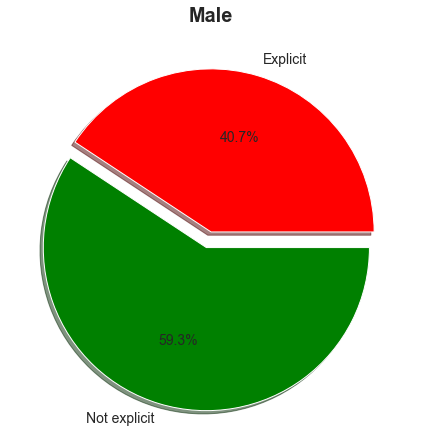

In [78]:
#create pie-chart for male artists 
data_men_explicit=({'Explicit_or_not':["Explicit","Not explicit"],'Amount':[114,166],'Percentages':[["{:.0%}".format(114/280)],["{:.0%}".format(166/280)]]})
colors = ['red','green']
plt.figure(figsize=(7.5,7.5)) #determine size of the figure
explode=[0,0.1] #make the wedge representing 'explicit' stand out
pie_men=plt.pie(data_men_explicit['Amount'],colors=colors,shadow=True,explode=explode,autopct='%1.1f%%', labels = data_men_explicit['Explicit_or_not'], textprops={'fontsize': 14})
plt.title('Male', fontsize=20, weight = 'bold')

In [79]:
#two sample proportion z-test for comparing proportions of explicit/non-explicit use for gender
#create a proportion table to see the ratio explicit songs per gender
proportion_table_gender = pd.crosstab(df_combined.explicit,df_combined.gender).apply(lambda r:r/r.sum(),axis=0)
print(proportion_table_gender) #male artists have a higher ratio explicit songs than female artists

#test whether the difference between female and male artists is significant
n_explicit = np.array([20, 114])
n_rows = np.array([20 + 86, 114 + 166])
z_score, p_value = proportions_ztest(count = n_explicit, nobs = n_rows, alternative = "two-sided")
print(z_score, p_value) #difference is significant for alpha = 0.05 with p < 0.001

gender      female      male
explicit                    
0         0.811321  0.592857
1         0.188679  0.407143
-4.023945042268219 5.7231278013138486e-05


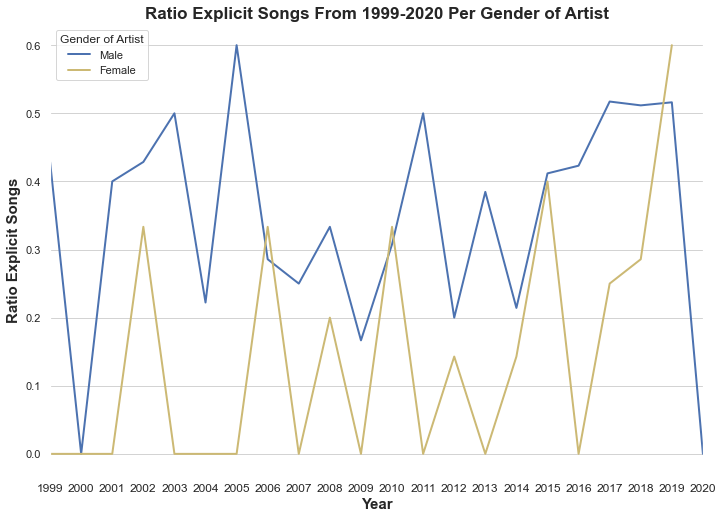

In [80]:
#create a graph with a white background displaying ratio explicit content used in songs per gender over years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'white'})
graph_explicit = sns.lineplot(data=df_combined[(df_combined["gender"] == "female") | (df_combined["gender"] == "male")], x="year", y="explicit", hue='gender', palette=['b', 'y'], linewidth=2, ci=None)
graph_explicit.set(xlim=(1999, 2020))

#change interval of x-axis
x = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks(ticks = x, fontsize = 12)

#change layout of the labels
plt.title('Ratio Explicit Songs From 1999-2020 Per Gender of Artist', weight='bold', fontsize = 17)
plt.xlabel('Year', weight='bold', fontsize = 15)
plt.ylabel('Ratio Explicit Songs', weight='bold', fontsize = 15)
plt.legend(title='Gender of Artist', labels=['Male', 'Female'])

#change the background grid so that only the horizontal lines are visible and change the color of the horizontal lines
graph_explicit.grid(axis='y', color = 'lightgray')

In [81]:
#check if graph and proportion explicit songs is correct
#start by creating two seperate dataframes for gender
df_male = df_combined[df_combined['gender']=='male']
df_female = df_combined[df_combined['gender']=='female']

#create and check proportion table for male artists
proportion_table_male = pd.crosstab(df_male.year,df_male.explicit).apply(lambda r:r/r.sum(),axis=0)
print(proportion_table_male) #proportions are correct

#create and check proportion table for female artists
proportion_table_female = pd.crosstab(df_female.year,df_female.explicit).apply(lambda r:r/r.sum(),axis=0)
print(proportion_table_female) #proportions are correct

explicit         0         1
year                        
1999      0.024096  0.026316
2000      0.024096  0.000000
2001      0.018072  0.017544
2002      0.024096  0.026316
2003      0.012048  0.017544
2004      0.042169  0.017544
2005      0.012048  0.026316
2006      0.030120  0.017544
2007      0.036145  0.017544
2008      0.036145  0.026316
2009      0.030120  0.008772
2010      0.054217  0.035088
2011      0.036145  0.052632
2012      0.048193  0.017544
2013      0.048193  0.043860
2014      0.066265  0.026316
2015      0.060241  0.061404
2016      0.090361  0.096491
2017      0.084337  0.131579
2018      0.126506  0.192982
2019      0.090361  0.140351
2020      0.006024  0.000000
explicit         0     1
year                    
1999      0.023256  0.00
2001      0.046512  0.00
2002      0.046512  0.10
2003      0.046512  0.00
2004      0.011628  0.00
2005      0.081395  0.00
2006      0.046512  0.10
2007      0.034884  0.00
2008      0.046512  0.05
2009      0.034884  0.00
2010

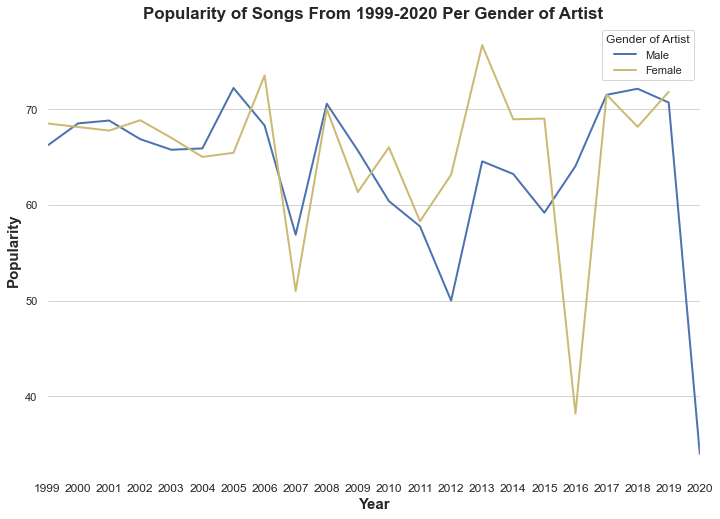

In [82]:
#create a graph with a white background displaying the popularity of songs per gender over years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'white'})
graph_popularity = sns.lineplot(data=df_combined[(df_combined["gender"] == "female") | (df_combined["gender"] == "male")], x="year", y="popularity", hue='gender', palette=['b', 'y'], linewidth=2, ci=None)
graph_popularity.set(xlim=(1999, 2020))

#change interval of x-axis
x = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
plt.xticks(ticks = x, fontsize = 12)

#change layout of the labels
plt.title('Popularity of Songs From 1999-2020 Per Gender of Artist', weight='bold', fontsize = 17)
plt.xlabel('Year', weight='bold', fontsize = 15)
plt.ylabel('Popularity', weight='bold', fontsize = 15)
plt.legend(title='Gender of Artist', labels=['Male', 'Female'])

#change the background grid so that only the horizontal lines are visible and change the color of the horizontal lines
graph_popularity.grid(axis='y', color = 'lightgray')

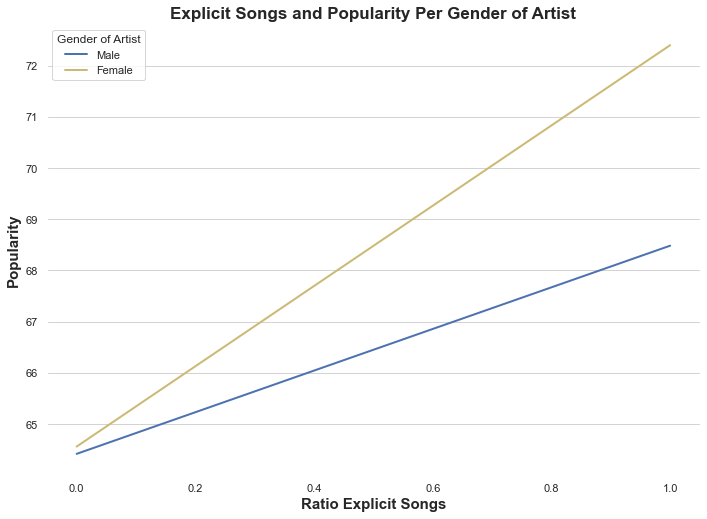

In [83]:
#create a graph with a white background displaying the ratio explicit songs and popularity per gender 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'axes.facecolor':'white'})
graph_ratio = sns.lineplot(data=df_combined[(df_combined["gender"] == "female") | (df_combined["gender"] == "male")], x="explicit", y="popularity", hue='gender', palette=['b', 'y'], linewidth=2, ci=None)

#change layout of the labels
plt.title('Explicit Songs and Popularity Per Gender of Artist', weight='bold', fontsize = 17)
plt.xlabel('Ratio Explicit Songs', weight='bold', fontsize = 15)
plt.ylabel('Popularity', weight='bold', fontsize = 15)
plt.legend(title='Gender of Artist', labels=['Male', 'Female'])

#change the background grid so that only the horizontal lines are visible and change the color of the horizontal lines
graph_ratio.grid(axis='y', color = 'lightgray')

In [84]:
#create bargraph showing the ratio explicit songs created by female and male artists per genre
#for this, we have to create lists per showing the frequency per genre and gender so that each genre is on a seperate row as the current dataframe has multiple genres on one row
#start by renaming the combined dataframe and the gender dataframes
explicit_combined = df_combined
explicit_male=df_male
explicit_female=df_female

#save rows for which values in column 'explicit == TRUE', in dataframe 'exT' 
exT = explicit_combined[(explicit_combined["explicit"] == True)]
exT = exT.reset_index() #reset index
exT

#repeat the same action, but then for the seperate gender dataframes with 'explicit == True'
exTM = explicit_male[(explicit_male["explicit"] == True)]
exTM = exTM.reset_index()
exTF = explicit_female[(explicit_female["explicit"] == True)]
exTF = exTF.reset_index()

#check dataframes -> correct
#exT #134 rows
#exTM #114 rows
#exTF #20 rows

In [85]:
#now we will looop throught exT, because we want to split and count the genres, so that we can store them in a dictionary
#we start by creating an empty dictionary 'frequency', loop through all rows of 'exT', split values of genre, andeither create a new key or add 1 as value in the dictionary
frequency = {}
max = len(exT)
for x in range(max):
    items = re.split(",", exT.loc[int(x):int(x),"genre"].values[0])
    #print (x,items)
    for item in items:
        #print (item)
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1  

#check dictionary explicit songs by both male and female artists
print(frequency)

#we repeat the previous step, but then for male artists only, so with 'exTM'
frequency_male = {}
max = len(exTM)
for x in range(max):
    items = re.split(",", exTM.loc[int(x):int(x),"genre"].values[0])
    #print (x,items)
    for item in items:
        #print (item)
        if item in frequency_male:
            frequency_male[item] += 1
        else:
            frequency_male[item] = 1

#check dictionary explicit songs by male artists
print(frequency_male)

#we repeat the previous step, but then for female artists only, so with 'exTF'
frequency_female = {}
max = len(exTF)
for x in range(max):
    items = re.split(",", exTF.loc[int(x):int(x),"genre"].values[0])
    #print (x,items)
    for item in items:
        #print (item)
        if item in frequency_female:
            frequency_female[item] += 1
        else:
            frequency_female[item] = 1

#check dictionary explicit songs by female artists
print(frequency_female)

{'pop': 18, 'hip hop': 104, 'Dance/Electronic': 5, ' R&B': 19, ' Dance/Electronic': 13, ' pop': 73, 'latin': 3, 'R&B': 2, 'rock': 2}
{'pop': 10, 'hip hop': 95, 'Dance/Electronic': 5, ' R&B': 12, ' Dance/Electronic': 11, ' pop': 63, 'latin': 3, 'rock': 1}
{'pop': 8, 'hip hop': 9, ' pop': 10, 'R&B': 2, ' Dance/Electronic': 2, ' R&B': 7, 'rock': 1}


In [86]:
#create dataframe with the information from the dictionaries presented above
#start by combining the information in a new dictionary
dict_explicit=({'Genre':["Dance/Electronic","Hip Hop","Latin","Pop","R&B","Rock"],'Total':[18,104,3,91,21,2],'Men':[16,95,3,73,12,1],'Women':[2,9,0,18,9,1]})

#transform dictionary in a dataframe
df_explicit = pd.DataFrame(dict_explicit)
df_explicit

,Genre,Total,Men,Women
0,Dance/Electronic,18,16,2
1,Hip Hop,104,95,9
2,Latin,3,3,0
3,Pop,91,73,18
4,R&B,21,12,9
5,Rock,2,1,1


In [87]:
#calculate percentage songs create by male and female artists per genre
#calculate percentage male
percentage_male = df_explicit['Men']/df_explicit['Total']
print(percentage_male)

#calculate percentage female
percentage_female = df_explicit['Women']/df_explicit['Total']
print(percentage_female)

#add percentages of both gender to dataframe
df_explicit['Percent_Male'] = percentage_male
df_explicit['Percent_Female'] = percentage_female

#check dataframe
df_explicit

0    0.888889
1    0.913462
2    1.000000
3    0.802198
4    0.571429
5    0.500000
dtype: float64
0    0.111111
1    0.086538
2    0.000000
3    0.197802
4    0.428571
5    0.500000
dtype: float64


,Genre,Total,Men,Women,Percent_Male,Percent_Female
0,Dance/Electronic,18,16,2,0.888889,0.111111
1,Hip Hop,104,95,9,0.913462,0.086538
2,Latin,3,3,0,1.000000,0.000000
3,Pop,91,73,18,0.802198,0.197802
4,R&B,21,12,9,0.571429,0.428571
5,Rock,2,1,1,0.500000,0.500000


In [88]:
#create new dataframe and drop irrelevant columns and set index to 'Genre'
df_percentages=df_explicit.drop(['Total','Men','Women'],axis=1)
df_percentages.set_index('Genre', inplace = True, drop =True)
df_percentages

,Percent_Male,Percent_Female
Genre,,
Dance/Electronic,0.888889,0.111111
Hip Hop,0.913462,0.086538
Latin,1.000000,0.000000
Pop,0.802198,0.197802
R&B,0.571429,0.428571
Rock,0.500000,0.500000


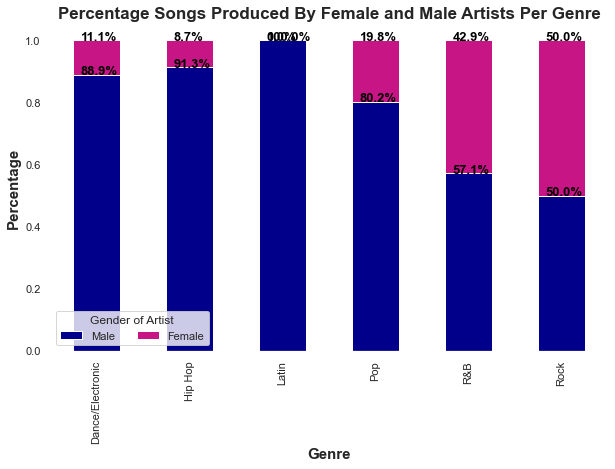

In [89]:
#create a 100% stacked bargraph with the values from df_percentages
colors=['darkblue','mediumvioletred']
df_percentages.plot(kind='bar', 
                    stacked=True, 
                    color = colors, 
                    figsize=(10, 6))

#change the layout of the labels, title, legend
plt.title('Percentage Songs Produced By Female and Male Artists Per Genre', weight='bold', fontsize = 17)
plt.legend(title='Gender of Artist', labels=['Male', 'Female'], loc="lower left", ncol=2)
plt.xlabel("Genre", weight = 'bold', fontsize = 15)
plt.ylabel("Percentage", weight = 'bold', fontsize = 15)

#create a loop so that the percentages are also visible in the barchart and change the layout of the percentages
for n, x in enumerate([*df_percentages.index.values]):
    for (proportion, y_loc) in zip(df_percentages.loc[x],
                                   df_percentages.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion*100, 1)}%', 
                 color="black",
                 fontsize=13,
                 fontweight="bold")

#check barchart
plt.show()